In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import joblib
import csv

In [2]:
csvfile = '../Resources/Callstreet_Bets.csv'
data = pd.read_csv(csvfile)
data = data.fillna(0)
data.head()

,Date,ticker,mention_count,percent_change
0,2021-01-28,AMC,214.0,0.0
1,2021-01-28,BB,123.0,0.0
2,2021-01-28,CLF,0.0,0.0
3,2021-01-28,CLNE,0.0,0.0
4,2021-01-28,CLOV,1.0,0.0


In [3]:
df_10_or_more_mentions = data[data['mention_count'] >= 10]

In [4]:
df_10_or_more_mentions.head()

,Date,ticker,mention_count,percent_change
0,2021-01-28,AMC,214.0,0.000000
1,2021-01-28,BB,123.0,0.000000
6,2021-01-28,GME,419.0,0.000000
9,2021-01-28,SENS,11.0,0.000000
12,2021-01-29,AMC,2276.0,0.429507


In [5]:
X = df_10_or_more_mentions['mention_count'].values.reshape(-1, 1)
y = df_10_or_more_mentions['percent_change'].values.reshape(-1, 1)

/Users/tiffanyharris/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

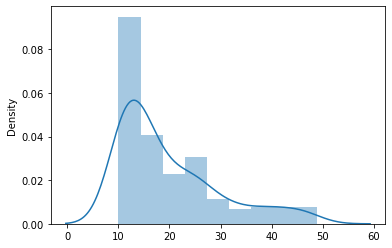

In [6]:
sns.distplot(X[X < 50])

In [7]:
print(len(X))

264


<AxesSubplot:xlabel='mention_count', ylabel='percent_change'>

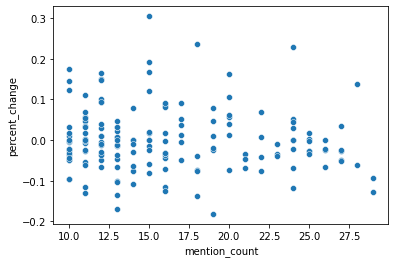

In [8]:
sns.scatterplot(x = 'mention_count', y = 'percent_change', data = df_10_or_more_mentions[df_10_or_more_mentions['mention_count'] < 30])

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.33)

In [10]:
x_test

array([[  17.],
       [  16.],
       [  10.],
       [  19.],
       [  18.],
       [ 177.],
       [  10.],
       [  97.],
       [  13.],
       [ 168.],
       [  38.],
       [  13.],
       [  11.],
       [  15.],
       [  60.],
       [ 275.],
       [  16.],
       [ 171.],
       [  13.],
       [  16.],
       [  16.],
       [ 192.],
       [  12.],
       [  36.],
       [  11.],
       [  33.],
       [  11.],
       [ 109.],
       [  17.],
       [  42.],
       [  11.],
       [  46.],
       [  19.],
       [  16.],
       [  16.],
       [  48.],
       [  12.],
       [  27.],
       [  18.],
       [ 106.],
       [  11.],
       [  19.],
       [  85.],
       [1280.],
       [1256.],
       [  23.],
       [  10.],
       [  27.],
       [  13.],
       [  33.],
       [  12.],
       [  11.],
       [  46.],
       [  20.],
       [  21.],
       [ 123.],
       [  29.],
       [  13.],
       [  19.],
       [  45.],
       [  25.],
       [  20.],
       [

In [11]:
y_train

array([[ 0.00000000e+00],
       [-8.12826470e-02],
       [-3.50913198e-02],
       [-6.15645321e-02],
       [-2.82368915e-02],
       [ 1.80498248e-02],
       [ 6.06968245e-02],
       [-6.77486597e-02],
       [-6.70057343e-02],
       [-7.24557221e-02],
       [-5.31079473e-01],
       [-2.76783957e-02],
       [ 0.00000000e+00],
       [-2.56292856e-02],
       [ 8.47652763e-02],
       [-1.21353839e-01],
       [-9.16290732e-01],
       [ 0.00000000e+00],
       [ 8.78858635e-02],
       [ 4.23255099e-01],
       [ 1.61755225e-01],
       [ 5.54017525e-03],
       [ 2.64255672e-02],
       [-3.95538481e-01],
       [-2.55332371e-02],
       [-3.82654850e-02],
       [-9.21249604e-02],
       [ 1.06275452e-01],
       [ 2.35754711e-02],
       [ 1.66486461e-01],
       [ 1.26484109e-01],
       [ 0.00000000e+00],
       [-1.10133693e-02],
       [ 7.84730285e-03],
       [ 1.24224886e-02],
       [ 1.43266434e-01],
       [ 1.70236361e-01],
       [ 6.37178464e-02],
       [ 1.4

In [12]:
y_test

array([[-3.66300440e-03],
       [-1.16570151e-01],
       [ 1.06762476e-02],
       [-1.81795334e-01],
       [-7.31426330e-02],
       [ 1.68399027e-01],
       [-9.65993924e-02],
       [ 4.21456580e-02],
       [-1.70479720e-01],
       [-6.64472575e-02],
       [-4.12311077e-01],
       [-3.78703204e-02],
       [-5.39505121e-02],
       [ 3.04412545e-01],
       [-1.76140670e-01],
       [ 3.68993984e-02],
       [-7.00611884e-02],
       [ 3.45064273e-01],
       [-1.35493460e-02],
       [-1.24011885e-01],
       [ 9.20064819e-02],
       [ 3.92789056e-02],
       [ 9.34812348e-02],
       [-7.54237239e-02],
       [-1.30053141e-01],
       [-4.04410052e-02],
       [-1.14943246e-01],
       [ 8.51578051e-02],
       [ 5.10062194e-02],
       [ 1.36336448e-01],
       [ 3.10782265e-02],
       [-7.36282970e-03],
       [-1.90152889e-02],
       [-2.50729206e-03],
       [-3.70335391e-02],
       [ 0.00000000e+00],
       [ 9.54794502e-03],
       [-2.37854769e-02],
       [-3.8

In [13]:
tree_regressor = DecisionTreeRegressor()
model = tree_regressor.fit(x_train,y_train)

In [14]:
model.score(x_test, y_test)

-0.18414601569920364

In [15]:
model.score(x_train, y_train)

0.7899358835644925

In [16]:
filename = "model.sav"
joblib.dump(model, filename)

['model.sav']

In [17]:
loaded_model = joblib.load(filename)

In [18]:
loaded_model.predict([[240]])*100

array([13.72011293])